In [ ]:
if __name__ == '__main__':
    wav_file = '../data/wav/BASIC5000_0001.wav'

In [ ]:
target_time = 0.58
fft_size = 1024
out_plot = './spectrium.png'

In [ ]:
with wave.open(wav_file) as wav:
    sampling_frequency = wav.getframerate()
    waveform = wav.readframes(wav.getnframes())
    waveform = np.frombuffer(waveform, dtype = np.int16)

In [ ]:
target_index = np.int(target_time * sampling_frequency)
frame = waveform[target_index: target_index + fft_size]

In [ ]:
spectrium = np.fft.fft(frame)
absolute = np.abs(spectrium)
absolute = absolute[:np.int(fft_size/2) + 1]
log_absolute = np.log(absolute + 1E-7)

In [ ]:
plt.figure(figsize = (10, 10))
plt.subplot(2, 1, 1)

In [ ]:
plt.subplot(2, 1, 2)
freq_axis = np.arange(np.int(fft_size/2)+1) \* sampling_frequency / fft_size

plt.plot(freq_axis, log_absolute)

In [ ]:
plt.title('log=absolute spectrium')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Value')
plt.xlim([0, sampling_frequency / 2])
plt.savefig(out_plot)

code 3.2 test_fft.py: wav 파이의 특정 시각 파형을 푸리에 변환하여 로그 진폭 스펙트럼을 표시

In [ ]:
if __name__ == '__main__':
    wav_file = '../data/wav/BASIC5000_0001.wav'
    
    target_time = 0.58
    fft_size = 1024
    out_plot = './spectrum.png'
    
    with wave.open(wav_file) as wav:
        sampling_frequency = wav.getframerate()
        sampling_size = wav.getampwidth()
        num_channels = wav.getnchannels()
        num_samples = wav.getnframes()
        
        waveform = wav.readframes(wav.getnframes())
        waveform = np.frombuffer(waveform, dtype = np.int16)
        
        target_index = np.int(target_time * sampling_frequency)
        frame = waveform[target_index: target_index + fft_size]
        specturm = np.fft.fft(frame)
        absolute = np.abs(specturm)
        absolute = absolute[:np.int(fft_size / 2) + 1]
        log_absolute = np.log(absolute + 1E-7)
        
        plt.figure(figsize = (10, 10))
        time_axis = np.arange(num_samples) / sample_frequency
        plt.subplot(2, 1, 1)
        plt.plot(time_axis, waveform)
        plt.xlim([0: num_samples / sampling_frequency])
        plt.title('Waveform')
        plt.xlabel('Time [sec]')
        plt.ylabel('Value')
        
        plt.subplot(2, 1, 2)
        freq_axis = np.arange(np.int(fft_size / 2) + 1) * sampling_frequency / fft_size 
        plt.plot(freq_axis, log_absolute)
        plt.title('log-absolute specturm')
        plt.xlabel('Frequency [Hz]')
        plt.ylabel('Value')
        plt.xlim([0, sampling_frequency / 2])
        
        plt.savefig(out_plot)

 
------------------------------------------------------
### 2025.02.24

In [ ]:
if __name__ == '__main__':
    wav_path = os.path.join(os.getcwd(), './basic5000/wav/', 'basic5000_4500.wav')
    out_log_plot = 'out_log_plot.png' # out_plot = './spectrum.png'
    
    target_time = 1.5
    fft_size = 256
    
    with wave.open(wav_path) as wav:
        sampling_frequency = wav.getframerate()
        num_samples = wav.getnframes()
        window_size = 25 # 아 window화가 아니라 고속 푸리에 변환을 하는 거니까 fft를 시행할 프레임 개수만큼 slicing을 해주면 됨
        
        target_sample = 1.5 * sampling_frequency / num_samples  # 분석 시간을 샘플 번호로 변환 target_index = np.int(target_time * sampling_frequency)
        window_size_frame = 25 * 0.001 * sampling_frequency / num_samples # 필요 없음 .. ㅎ 
        
        waveform = wav.readframes(num_samples)
        waveform = np.frombuffer(waveform, dtype = np.int16)
        waveform = waveform[target_sample, target_sample + window_size_frame] # waveform = waveform[target_index: target_index + fft_size]
        
        waveform = np.fft.fft(waveform) # spectrum = np.fft.fft(waveform)
        waveform = np.abs(np.fft.ret(waveform)) # absolute = np.abs(spectrum)
        waveform = waveform[waveform > 0] # absolute = absolute[:np.int(fft_size / 2) + 1]
        
        log_waveform = np.log(waveform)
        log_waveform[log_waveform < 1E-7] = 1E-7 # log_absolute = np.log(absolute + 1E-7)
        

In [ ]:
time_axis = np.range(num_samples) / sampling_frequency # 시간 축이 아니라 주파수 축 freq_axis = np.arange(np.int(fft_size / 2) + 1) * sampling_frequency / fft_size


plt.plot(time_axis, log_waveform, color = 'grey') 
# 시각화 영역 생성 plt.figure(figsize = (10, 10))
# 그림 영역을 종으로 2분할 plt.subplots(2, 1, 2)

plt.title('FFT waveform') # plt.title('log-absolute spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude') # plt.ylabel('Value')
plt.xlim([0, num_samples / sampling_frequency]) # [0, sampling_frequency / 2]
plt.show()
plt.savefig(out_log_plot)

----------------------

In [16]:
import wave
import os
import numpy as np
import matplotlib.pyplot as plt

wav_path = r'C:\Users\Aaron Cho\project\PDA\voice\basic5000\wav\BASIC5000_4500.wav'
out_plot = 'spectrum.png'

target_time = 1.74
fft_size = 512

In [33]:
num_samples / sampling_frequency

4.12

In [34]:
target_index

83520

In [35]:
target_index + fft_size

84032

In [38]:
with wave.open(wav_path) as wav:
    sampling_frequency = wav.getframerate()
    num_samples = wav.getnframes()
    waveform = wav.readframes(num_samples)
    # 아 맞다 데이터타입 변환 
    waveform = np.frombuffer(waveform, np.int16)
    
    target_index = int(target_time * sampling_frequency)
    target_waveform = waveform[target_index: target_index + fft_size]
    
    spectrum = np.fft.fft(target_waveform)
    absolute = np.abs(spectrum)
    absolute = absolute[:int(fft_size / 2) + 1]
    log_absolute = np.log(absolute)
    log_absolute[log_absolute < 1E-7] = 1E-7

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

<Figure size 1080x720 with 0 Axes>

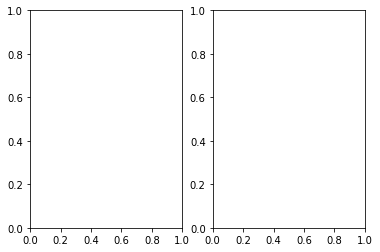

In [42]:
time_axis = np.arange(num_samples) / sampling_frequency 
freq_axis = np.arange(sampling_frequency / 2) / int(fft_size / 2) + 1 
# np.arange(int(fft_size / 2) + 1) * sampling_frequency / fft_size
    
    
plt.figure(figsize = (15, 10))
fig, ax = plt.subplots(1, 2)
    
ax[0, 0].plot(time_axis, waveform, color = 'green')
ax[0, 0].title('waveform')
ax[0, 0].xlabel('Time [sec]')
ax[0, 0].ylabel('Value')
ax[0, 0].xlim([0, num_samples / sampling_frequency])
    
ax[0, 1].plot(freq_axis, log_absolute, color = 'blue')
ax[0, 1].title('log-absolute spectrum')
ax[0, 1].xlabel('Freq [Hz]')
ax[0, 1].ylabel('Value')
ax[0, 1].xlim([0, sampling_frequency / 2])

In [50]:
freq_axis = np.arange(int(fft_size / 2) + 1) *sampling_frequency / fft_size

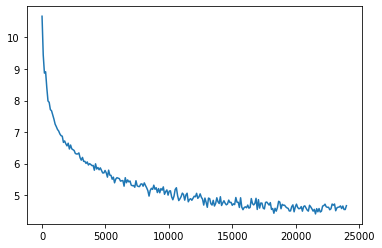

In [51]:
plt.plot(freq_axis, log_absolute)